In [1]:
import numpy as numpy
from numpy import ndarray
from matplotlib.legend import Legend
from matplotlib import pyplot as pyplot

# Extract unstretched PEG dihedral histogram data & calculate probability densities

In [2]:
rdf_path: str = '../data/raw/dihedral-vs-time/'

# File contains columns of data, the .T transpose operation switches them to rows, making it easier to
# unpack into separate variables
# Extract unstretched PEG dihedral histogram data
(unstretched_bin, unstretched_dihedrals, unstretched_dihedrals_bin_counts,
 unstretched_bin_dihedral_count_total_fraction) = numpy.genfromtxt(
    rdf_path + 'initial_dihedral.histo',
    skip_header=4,
    usecols=range(4)
).T

# The numpy.diff() method calculates the difference between consecutive elements in an array
# It can therefore be used to calculate the width of each bin from an array of bin center values (i.e. the
# `unstretched_dihedrals` in our case
# Because the first bin/element does not have a preceding bin to subtract from, it needs special handling.
# We therefore prepend the first element so the first bin/element can subtract from itself
unstretched_bin_widths = numpy.diff(unstretched_dihedrals, prepend=unstretched_dihedrals[0])

# Sum up all the dihedral counts across all bins to get total bin count
unstretched_total_bin_counts: int = numpy.sum(unstretched_dihedrals_bin_counts)

# Normalise bin counts to obtain probability density using previously calculate variables
unstretched_dihedrals_probability_density = (
        unstretched_dihedrals_bin_counts / (unstretched_total_bin_counts * unstretched_bin_widths)
)

/tmp/ipykernel_186408/158318568.py:25: RuntimeWarning: divide by zero encountered in divide
  unstretched_dihedrals_bin_counts / (unstretched_total_bin_counts * unstretched_bin_widths)


# Extract stretched PEG dihedral histogram data & calculate probability densities

In [3]:
# Extract stretched PEG dihedral histogram data and calculate probability densities
(stretched_bin, stretched_dihedrals, stretched_dihedrals_bin_counts,
 stretched_bin_dihedral_count_total_fraction) = numpy.genfromtxt(
    rdf_path + 'final_dihedral.histo',
    skip_header=4,
    usecols=range(4)
).T

stretched_bin_widths = numpy.diff(stretched_dihedrals, prepend=stretched_dihedrals[0])
stretched_total_bin_counts: int = numpy.sum(stretched_dihedrals_bin_counts)
stretched_dihedrals_probability_density = (
        stretched_dihedrals_bin_counts / (stretched_total_bin_counts * stretched_bin_widths)
)

/tmp/ipykernel_186408/713776654.py:12: RuntimeWarning: divide by zero encountered in divide
  stretched_dihedrals_bin_counts / (stretched_total_bin_counts * stretched_bin_widths)


# Create Matplotlib graph to plot deformation dihedral angle probability distribution before & after PEG deformation

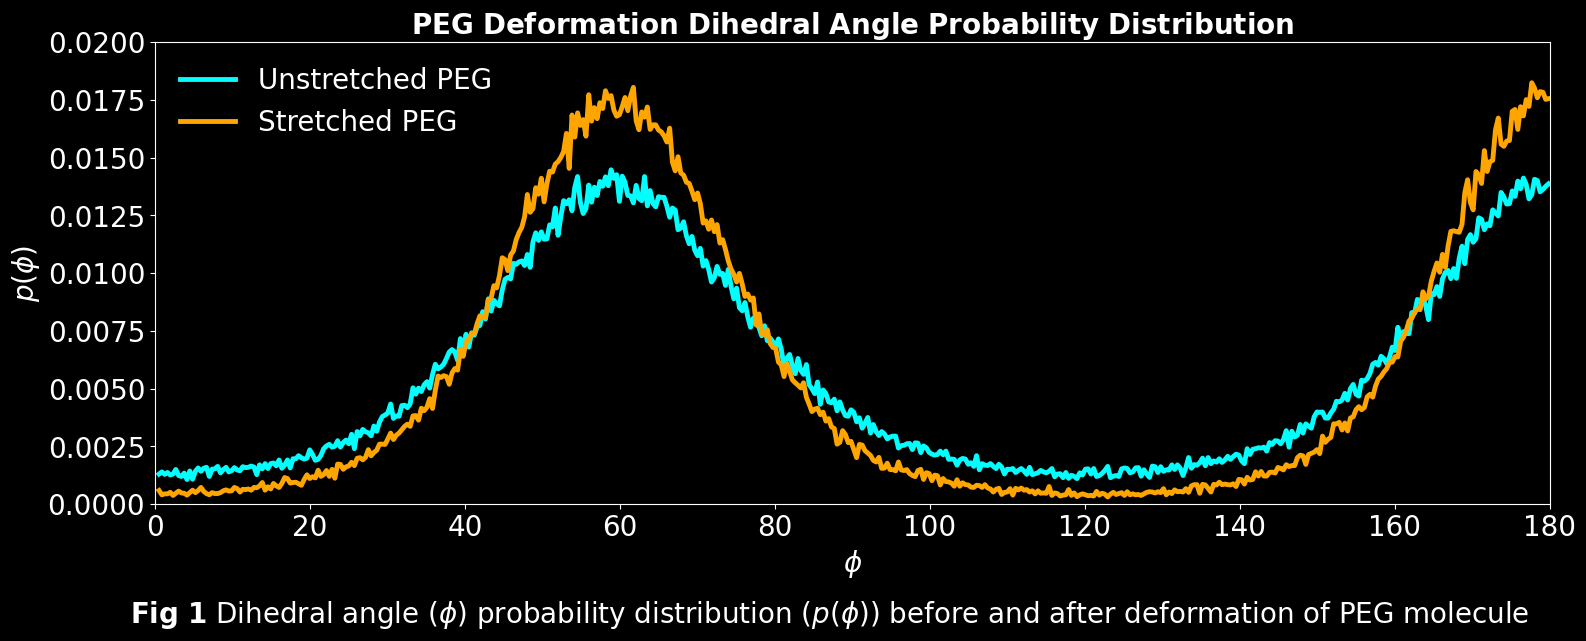

In [4]:
# Set up the line graph
probability_vs_dihedrals_line_graph, probability_vs_dihedrals_line_graph_axes = pyplot.subplots(
    figsize=(18, 6)
)
probability_vs_dihedrals_line_graph.patch.set_facecolor('black')
probability_vs_dihedrals_line_graph_axes.set_facecolor('black')

# Stylise ticks and spines
probability_vs_dihedrals_line_graph_axes.tick_params(colors='white', which='both', labelsize=20)
for spine in probability_vs_dihedrals_line_graph_axes.spines.values():
    spine.set_edgecolor('white')

# Plot the data
probability_vs_dihedrals_line_graph_axes.plot(unstretched_dihedrals, unstretched_dihedrals_probability_density, 
                                              color='cyan', linewidth=3.5, label='Unstretched PEG')
probability_vs_dihedrals_line_graph_axes.plot(stretched_dihedrals, stretched_dihedrals_probability_density,
                                              color='orange', linewidth=3.5, label='Stretched PEG')

# Set axes labels, limits and graph title
probability_vs_dihedrals_line_graph_axes.set_xlabel(r'$\phi$', fontsize=20, color='white')
probability_vs_dihedrals_line_graph_axes.set_ylabel(r'$p (\phi)$', fontsize=20, color='white')
probability_vs_dihedrals_line_graph_axes.set_xlim(0, 180)
probability_vs_dihedrals_line_graph_axes.set_ylim(0.00, 0.02)
probability_vs_dihedrals_line_graph_axes.set_title(
    r'$\bf{PEG\ Deformation\ Dihedral\ Angle\ Probability\ Distribution}$', 
    fontsize=20, color='white'
)

# Add legend
legend: Legend = probability_vs_dihedrals_line_graph_axes.legend(loc='upper left', frameon=False, fontsize=20)
for text in legend.get_texts():
    text.set_color('white')

# Add figure title
probability_vs_dihedrals_line_graph.text(0.5, -0.075, 
                                         r'$\bf{Fig\ 1}$ Dihedral angle ($\phi$) probability distribution '
                                         r'($p (\phi)$) before and after deformation of PEG molecule',
                ha='center', va='center', color='white', fontsize=20)

# Save & display the plot
pyplot.savefig('../reports/figures/graphs/PEG-deformatino-probability-vs-dihedrals.png', bbox_inches='tight')
pyplot.show()